In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 初始化Q值表
Q_values = []
prob_licks = []

# 小鼠数量和阶段数量
num_mice = 5
num_stages = 3
stage_list = ['stable', 'uncertain', 'reverse']

# 定义学习率和折扣因子
learning_rate = 0.9
discount_factor = 0.1

# 循环处理每只小鼠
for mouse in range(num_mice):
    # 读取训练阶段的数据
    training_csv_file = f'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\ACC_TRAINING_cwq\pre_training_qiyun\pre_traning_mice_selcect_data\\0{mouse+1}mice0{mouse+1}.csv'
    training_data = pd.read_csv(training_csv_file)

    # 获取训练阶段的outcome列的值
    training_outcomes = training_data['outcome'].values

    # 确定状态空间大小
    num_states = len(training_outcomes)

    # 初始化Q值表
    Q = np.zeros((num_states, 2))  # 2为动作空间的大小

    # 根据训练数据更新Q值表
    for i in range(num_states):
        # 获取当前状态和行为选择
        current_state = f'state{i+1}'
        if training_outcomes[i] == 1:
            action = 'lick'
        elif training_outcomes[i] == 2:
            action = 'no_lick'

        # 获取下一个状态
        next_state = f'state{i+2}' if i < num_states - 1 else None

        # 计算当前状态和行为选择对应的Q值
        current_q_value = Q[i][0] if action == 'lick' else Q[i][1]

        # 计算下一个状态的最大Q值
        max_q_value = np.max(Q[i+1]) if next_state is not None else 0
        # max_q_value = Q[i+1] if next_state is not None else 0


        # 计算奖励值
        if training_outcomes[i] == 1:
            reward = 1
        elif training_outcomes[i] == 2:
            reward = 0.1

        # 更新Q值表
        if action == 'lick':
            Q[i][0] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)
        else:
            Q[i][1] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)

    # 计算训练阶段选择lick的概率
    prob_lick_training = np.exp(Q[:, 0]) / np.sum(np.exp(Q), axis=1)

    # 保存训练阶段的Q值表和选择lick的概率
    Q_values.append(Q.copy())
    prob_licks.append(prob_lick_training.copy())

    # 使用训练阶段最后一行Q值作为初始Q值
    Q_initial = Q_values[-1].copy()
    # print(Q_initial.shape)
    # 循环处理每个阶段的数据
    for stage in stage_list:
        # 读取对应的.csv文件
        csv_file = f'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\{stage}{mouse+1}.csv'
        data = pd.read_csv(csv_file)

        # 筛选stimulus=1的行作为go信号的数据集
        go_data = data[data['stimulus'] == 1]

        # 获取outcome列的值
        outcomes = go_data['outcome'].values

        # 确定状态空间大小
        num_states = len(outcomes)

        # 使用训练阶段的最后一行Q值作为初始Q值
        Q = Q_initial.copy()

        # 更新Q值表
        for i in range(num_states):
            # 获取当前状态和行为选择
            current_state = f'state{i+1}'
            if outcomes[i] in [1, 4, 5]:
                action = 'lick'
            elif outcomes[i] in [2, 3]:
                action = 'no_lick'

            # 获取下一个状态
            next_state = f'state{i+2}' if i < num_states - 1 else None

            # 计算当前状态和行为选择对应的Q值
            current_q_value = Q[i][0] if action == 'lick' else Q[i][1]

            # 计算下一个状态的最大Q值
            max_q_value = np.max(Q[i+1]) if next_state is not None else 0
            # max_q_value = Q[i+1] if next_state is not None else 0


            # 计算奖励值
            if outcomes[i] == 1:
                reward = 1
            elif outcomes[i] == 4:
                reward = -1
            elif outcomes[i] == 2:
                reward = 0
            elif outcomes[i] == 5:
                reward = 0
            else:
                reward = 0

            # 更新Q值表
            if action == 'lick':
                Q[i][0] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)
            else:
                Q[i][1] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)

        # 计算每个状态下选择lick的概率
        prob_lick = np.exp(Q[:, 0]) / np.sum(np.exp(Q), axis=1)

        # 保存Q值表和选择lick的概率
        Q_values.append(Q.copy())
        prob_licks.append(prob_lick.copy())


In [11]:
print(Q_values[1].shape)
print(prob_licks[1])

(295, 2)
[0.74478704 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704
 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704
 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704
 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704
 0.74478704 0.74478704 0.74478704 0.74478704 0.74478704 0.73068485
 0.70909649 0.73068485 0.70909649 0.74478704 0.74478704 0.74478704
 0.72908792 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.47751518 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.47751518 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.7109495  0.7109495  0.7109495  0.7109495  0.7109495  0.7109495
 0.7109495  0.7109495  0.7109495  0.47751518 0.7109495  0.7109495
 0.47751518 0.47751518 0.7109495  0.47751518 0.7109495  0.710

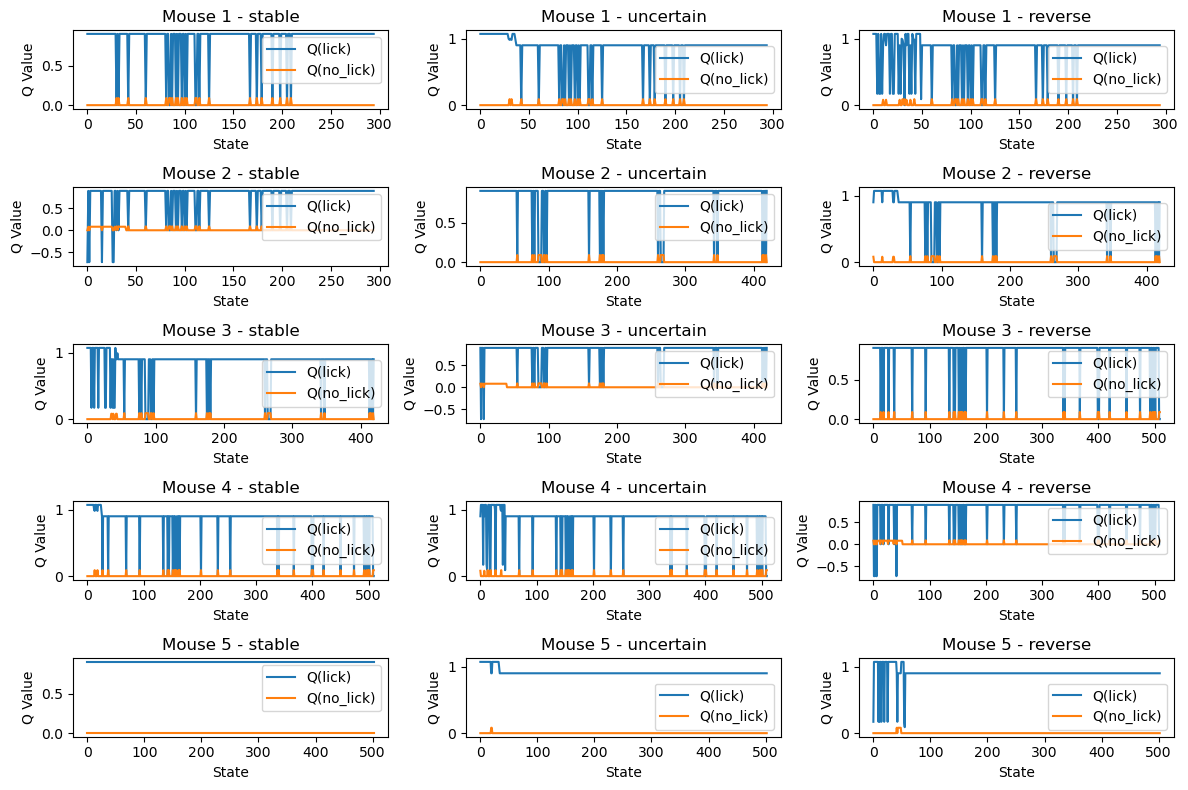

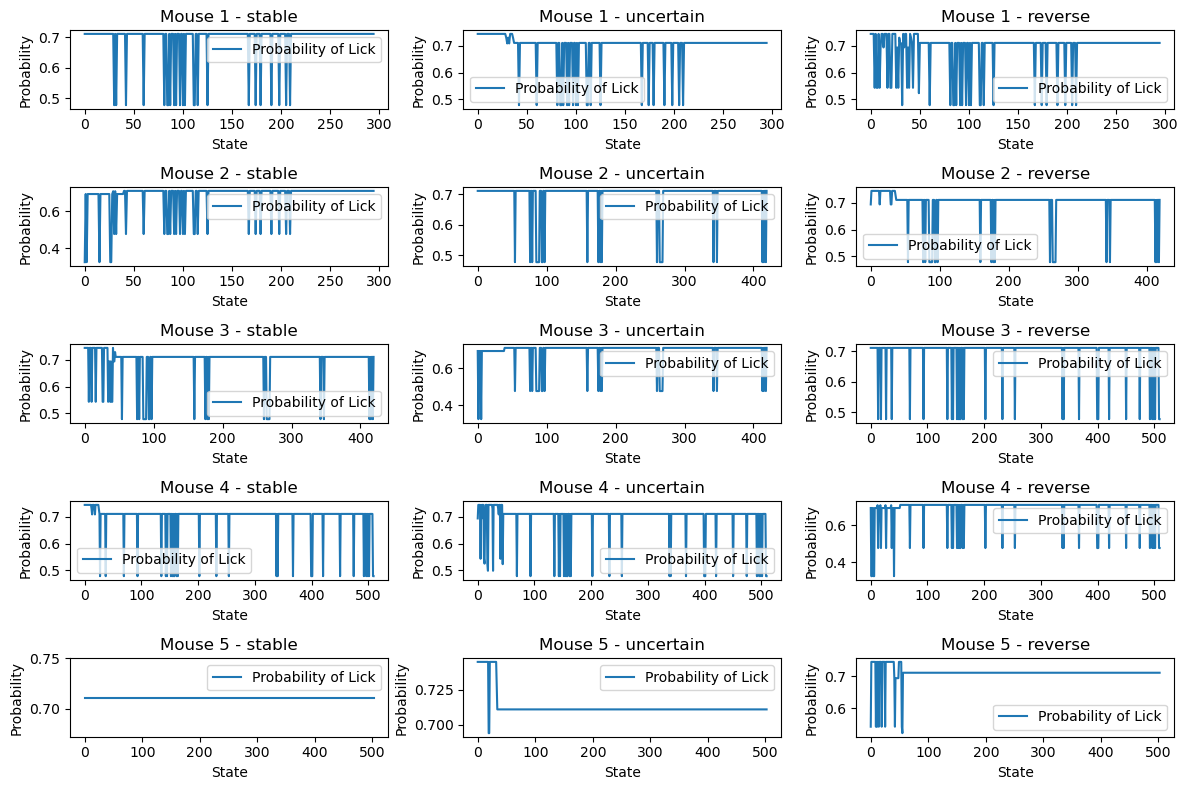

In [12]:
# 绘制Q值变化图
fig, axs = plt.subplots(num_mice, num_stages, figsize=(12, 8))

for i in range(num_mice):
    for j in range(num_stages):
        q_values = Q_values[i * num_stages + j]
        axs[i, j].plot(q_values[:, 0], label='Q(lick)')
        axs[i, j].plot(q_values[:, 1], label='Q(no_lick)')
        axs[i, j].set_xlabel('State')
        axs[i, j].set_ylabel('Q Value')
        axs[i, j].set_title(f'Mouse {i+1} - {stage_list[j]}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()

# 绘制lick选择概率变化图
fig, axs = plt.subplots(num_mice, num_stages, figsize=(12, 8))

for i in range(num_mice):
    for j in range(num_stages):
        prob_lick = prob_licks[i * num_stages + j]
        axs[i, j].plot(prob_lick, label='Probability of Lick')
        axs[i, j].set_xlabel('State')
        axs[i, j].set_ylabel('Probability')
        axs[i, j].set_title(f'Mouse {i+1} - {stage_list[j]}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 初始化Q值表
Q_values = []
prob_licks = []

# 小鼠数量和阶段数量
num_mice = 5
num_stages = 3
stage_list = ['stable', 'uncertain', 'reverse']

# 定义学习率和折扣因子
learning_rate = 0.9
discount_factor = 0.1

# 循环处理每只小鼠
for mouse in range(num_mice):
    # 读取训练阶段的数据
    training_csv_file = f'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\ACC_TRAINING_cwq\pre_training_qiyun\pre_traning_mice_selcect_data\\0{mouse+1}mice0{mouse+1}.csv'
    training_data = pd.read_csv(training_csv_file)

    # 获取训练阶段的outcome列的值
    training_outcomes = training_data['outcome'].values

    # 确定状态空间大小
    num_states = len(training_outcomes)

    # 初始化Q值表
    Q = np.zeros((num_states, 2))  # 2为动作空间的大小

    # 使用训练阶段的最后一行Q值作为初始Q值
    Q_initial = Q.copy()

    # 根据训练数据更新Q值表
    for i in range(num_states):
        # 获取当前状态和行为选择
        current_state = f'state{i+1}'
        if training_outcomes[i] == 1:
            action = 'lick'
        elif training_outcomes[i] == 2:
            action = 'no_lick'

        # 获取上一次lick的Q值
        if i > 0:
            prev_lick_q_value = Q[i-1][0]
        else:
            prev_lick_q_value = 0

        # 获取下一个状态
        next_state = f'state{i+2}' if i < num_states - 1 else None

        # 计算当前状态和行为选择对应的Q值
        current_q_value = Q[i][0] if action == 'lick' else Q[i][1]

        # 计算下一个状态的最大Q值
        max_q_value = np.max(Q[i+1]) if next_state is not None else 0

        # 计算奖励值
        if training_outcomes[i] == 1:
            reward = 1
        elif training_outcomes[i] == 2:
            reward = 0.1

        # 更新Q值表
        if action == 'lick':
            Q[i][0] += learning_rate * (reward + discount_factor * max_q_value - current_q_value + discount_factor * prev_lick_q_value)
        else:
            Q[i][1] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)

    # 计算训练阶段选择lick的概率
    prob_lick_training = np.exp(Q[:, 0]) / np.sum(np.exp(Q), axis=1)

    # 保存训练阶段的Q值表和选择lick的概率
    Q_values.append(Q.copy())
    prob_licks.append(prob_lick_training.copy())

    # 循环处理每个阶段的数据
    for stage in stage_list:
        # 读取对应的.csv文件
        csv_file = f'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\{stage}{mouse+1}.csv'
        data = pd.read_csv(csv_file)

        # 筛选stimulus=1的行作为go信号的数据集
        go_data = data[data['stimulus'] == 1]

        # 获取outcome列的值
        outcomes = go_data['outcome'].values

        # 确定状态空间大小
        num_states = len(outcomes)

        # 使用训练阶段的最后一行Q值作为初始Q值
        Q = Q_initial.copy()

        # 更新Q值表
        for i in range(num_states):
            # 获取当前状态和行为选择
            current_state = f'state{i+1}'
            if outcomes[i] in [1, 4, 5]:
                action = 'lick'
            elif outcomes[i] in [2, 3]:
                action = 'no_lick'

            # 获取上一次lick的Q值
            if i > 0 and action == 'lick':
                prev_lick_q_value = Q[i-1][0]
            else:
                prev_lick_q_value = 0

            # 获取下一个状态
            next_state = f'state{i+2}' if i < num_states - 1 else None

            # 计算当前状态和行为选择对应的Q值
            current_q_value = Q[i][0] if action == 'lick' else Q[i][1]

            # 计算下一个状态的最大Q值
            max_q_value = np.max(Q[i+1]) if next_state is not None else 0

            # 计算奖励值
            if outcomes[i] == 1:
                reward = 1
            elif outcomes[i] == 4:
                reward = -1
            elif outcomes[i] == 2:
                reward = 0
            elif outcomes[i] == 5:
                reward = 0
            else:
                reward = 0

            # 更新Q值表
            if action == 'lick':
                Q[i][0] += learning_rate * (reward + discount_factor * max_q_value - current_q_value + discount_factor * prev_lick_q_value)
            else:
                Q[i][1] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)

        # 计算每个状态下选择lick的概率
        prob_lick = np.exp(Q[:, 0]) / np.sum(np.exp(Q), axis=1)

        # 保存Q值表和选择lick的概率
        Q_values.append(Q.copy())
        prob_licks.append(prob_lick.copy())



In [ ]:
# 绘制Q值变化图
plt.figure(figsize=(12, 6))
for i, Q in enumerate(Q_values):
    plt.plot(Q[:, 0], label=f'Stage {i+1} - lick')
    plt.plot(Q[:, 1], label=f'Stage {i+1} - no_lick')
plt.xlabel('State')
plt.ylabel('Q Value')
plt.title('Q Value Evolution')
plt.legend()
plt.show()

# 绘制lick概率变化图
plt.figure(figsize=(12, 6))
for i, prob_lick in enumerate(prob_licks):
    plt.plot(prob_lick, label=f'Stage {i+1}')
plt.xlabel('State')
plt.ylabel('Lick Probability')
plt.title('Lick Probability Evolution')
plt.legend()
plt.show()


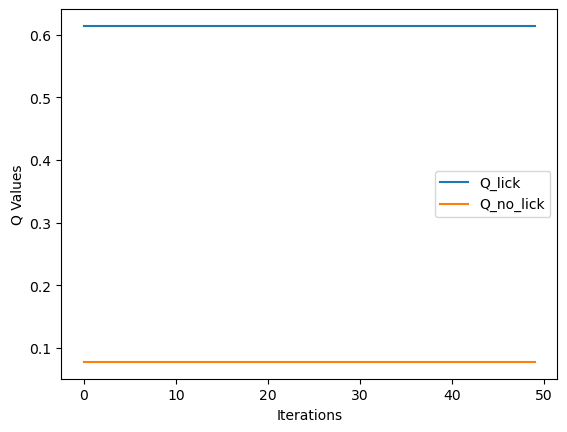

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 初始化Q值列表
Q_values = []

# 小鼠数量和阶段数量
num_mice = 1
num_stages = 3
# stage_list = ['stable', 'uncertain', 'reverse']
stage_list = ['uncertain']


# 定义学习率和折扣因子
learning_rate = 0.1
discount_factor = 0.1

# 循环处理每只小鼠
for mouse in range(num_mice):
    # 循环处理每个阶段的数据
    for stage in stage_list:
        # 读取对应的.csv文件
        csv_file = f'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\{stage}{mouse+1}.csv'
        data = pd.read_csv(csv_file)

        # 筛选stimulus=1的行作为go信号的数据集
        go_data = data[data['stimulus'] == 1]

        # 获取outcome列的值
        outcomes = go_data['outcome'].values

        # 确定状态空间大小
        num_states = len(outcomes)

        # 初始化Q值表
        Q = np.zeros((1, 2))  # 1行2列的Q表

        # 更新Q值表
        for i in range(num_states):
            # 获取当前状态和行为选择
            current_state = f'state{i+1}'
            if outcomes[i] in [1, 4, 5]:
                action = 'lick'
            elif outcomes[i] in [2, 3]:
                action = 'no_lick'

            # 获取下一个状态
            next_state = f'state{i+2}' if i < num_states - 1 else None

            # 计算当前状态和行为选择对应的Q值
            current_q_value = Q[0][0] if action == 'lick' else Q[0][1]

            # 计算下一个状态的最大Q值
            max_q_value = np.max(Q[0]) if next_state is not None else 0

            # 计算奖励值
            if outcomes[i] == 1:
                reward = 1
            elif outcomes[i] == 4:
                reward = -1
            elif outcomes[i] == 2:
                reward = 0.1
            elif outcomes[i] == 5:
                reward = -0.5
            else:
                reward = -0.1

            # 更新Q值表
            if action == 'lick':
                Q[0][0] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)
            else:
                Q[0][1] += learning_rate * (reward + discount_factor * max_q_value - current_q_value)

            # 存储当前Q值
            Q_values.append(Q[0])

# 将Q值列表转换为NumPy数组
Q_values = np.array(Q_values)

# 提取Q_lick和Q_no_lick的值
Q_lick = Q_values[:, 0]
Q_no_lick = Q_values[:, 1]

# 绘制Q值随迭代次数的变化图像
iterations = np.arange(len(Q_values))

plt.plot(iterations, Q_lick, label='Q_lick')
plt.plot(iterations, Q_no_lick, label='Q_no_lick')
plt.xlabel('Iterations')
plt.ylabel('Q Values')
plt.legend()
plt.show()


In [16]:
print(len(Q_values))

37


In [17]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # 初始化Q值表
# Q = np.zeros((2, 2))  # 2为状态空间的大小，2为动作空间的大小

# # 定义学习率和折扣因子
# learning_rate = 0.9
# discount_factor = 0.9

# # 存储每次动作更新后的Q值和选择lick的概率
# Q_values = []
# prob_licks = []

# # 循环处理每只小鼠
# for mouse in range(num_mice):
#     # 读取训练阶段的数据
#     training_csv_file = f'E:\project_wuqiyun\Pyddm_wuqiyun\原始数据\ACC_TRAINING_cwq\pre_training_qiyun\pre_traning_mice_selcect_data\\0{mouse+1}mice0{mouse+1}.csv'
#     training_data = pd.read_csv(training_csv_file)

#     # 获取训练阶段的outcome列的值
#     training_outcomes = training_data['outcome'].values

#     # 确定状态空间大小
#     num_states = len(training_outcomes)

#     # 初始化Q值表
#     Q = np.zeros((num_states, 2))  # 2为动作空间的大小

#     # 根据训练数据更新Q值表
#     for i in range(num_states):
#         # 获取当前状态和行为选择
#         current_state = f'state{i+1}'
#         if training_outcomes[i] == 1:
#             action = 'lick'
#         elif training_outcomes[i] == 2:
#             action = 'no_lick'

#         # 获取下一个状态
#         next_state = f'state{i+2}' if i < num_states - 1 else None

#         # 计算奖励值
#         if training_outcomes[i] == 1:
#             reward = 1
#         elif training_outcomes[i] == 2:
#             reward = 0.1

#         # 更新Q值表
#         if action == 'lick':
#             Q[i, 0] += learning_rate * (reward + discount_factor * np.max(Q[i]) - Q[i, 0])
#         else:
#             Q[i, 1] += learning_rate * (reward + discount_factor * np.max(Q[i]) - Q[i, 1])

#         # 计算选择lick的概率
#         prob_lick = np.exp(Q[i]) / np.sum(np.exp(Q[i]))

#         # 保存Q值和选择lick的概率
#         Q_values.append(Q.copy())
#         prob_licks.append(prob_lick.copy())

# # 绘制Q值变化图
# for i in range(num_mice):
#     Q_values_mouse = np.array(Q_values[i])
#     Q_lick = Q_values_mouse[:, 0]  # 提取Q值中的lick部分
#     Q_no_lick = Q_values_mouse[:, 1]  # 提取Q值中的no_lick部分

#     plt.plot(Q_lick, label=f'Q(lick) - Mouse {i+1}')
#     plt.plot(Q_no_lick, label=f'Q(no_lick) - Mouse {i+1}')

# plt.xlabel('State')
# plt.ylabel('Q Value')
# plt.title('Q Value Change')
# plt.legend()
# plt.show()

# # 绘制选择lick的概率变化图
# for i in range(num_mice):
#     prob_lick_mouse = np.array(prob_licks[i])
#     prob_lick = prob_lick_mouse[:, 0]  # 提取选择lick的概率

#     plt.plot(prob_lick, label=f'Prob(lick) - Mouse {i+1}')

# plt.xlabel('State')
# plt.ylabel('Probability')
# plt.title('Probability of Choosing Lick')
# plt.legend()
# plt.show()


